# Ratio to trend method

Fitting Trend: The statsmodels library is used to fit a linear regression to estimate the trend

Calculating Ratios: The ratio of actual sales to the trend value is computed for each data

Computing Seasonal Indices: The ratios are grouped by month, and their mean values are calculated tp estimate seasonal effects

Normalizartion: The seasonal indices are normalized so that their average equals 1, ensuring consistency

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [9]:
data = {
    'Month': pd.date_range(start = '2020-01', periods = 36, freq = 'M'),
    'Sales': [120,150,170,140,160,200,220,210,180,150,160,190,
               130,160,180,150,170,210,230,220,190,160,170,200,
               140,170,190,160,180,220,240,230,200,170,180,210] # random.randint(start, end, count)
}
df = pd.DataFrame(data)
df.head()

<ipython-input-9-2101fe0d6930>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start = '2020-01', periods = 36, freq = 'M'),


,Month,Sales
0,2020-01-31,120
1,2020-02-29,150
2,2020-03-31,170
3,2020-04-30,140
4,2020-05-31,160


# Step 1: Fit a trend line using linear regression

In [10]:
df['Time'] = np.arange(1, len(df) + 1)
X = sm.add_constant(df['Time'])
model = sm.OLS(df['Sales'], X).fit()
df['Trend'] = model.predict(X)
print(df['Trend'])

0     160.495495
1     161.657658
2     162.819820
3     163.981982
4     165.144144
5     166.306306
6     167.468468
7     168.630631
8     169.792793
9     170.954955
10    172.117117
11    173.279279
12    174.441441
13    175.603604
14    176.765766
15    177.927928
16    179.090090
17    180.252252
18    181.414414
19    182.576577
20    183.738739
21    184.900901
22    186.063063
23    187.225225
24    188.387387
25    189.549550
26    190.711712
27    191.873874
28    193.036036
29    194.198198
30    195.360360
31    196.522523
32    197.684685
33    198.846847
34    200.009009
35    201.171171
Name: Trend, dtype: float64


# Step 2: Calculate the seasonal ratios (actual / trend)

In [11]:
df['Ratio_to_trend'] = df['Sales'] / df['Trend']
df['Ratio_to_trend']

,Ratio_to_trend
0,0.747685
1,0.927887
2,1.044099
3,0.853752
4,0.968851
5,1.202600
6,1.313680
7,1.245325
8,1.060116
9,0.877424


# Step 3: Group by season (eg. month) to calculate the average ratios

In [12]:
df['Month_'] = df['Month'].dt.month
seasonal_ratios = df.groupby('Month_')['Ratio_to_trend'].mean()
seasonal_ratios

,Ratio_to_trend
Month_,
1,0.745357
2,0.911964
3,1.019555
4,0.843557
5,0.950187
6,1.166832
7,1.269998
8,1.206883
9,1.035302


# Normalize the seasonal indices to ensure their average is 1

In [13]:
seasonal_indices_normalize = seasonal_ratios / seasonal_ratios.mean()
seasonal_indices_normalize

,Ratio_to_trend
Month_,
1,0.745389
2,0.912004
3,1.019599
4,0.843594
5,0.950229
6,1.166883
7,1.270054
8,1.206935
9,1.035347


# Step 4: Add the seasonal indices to the df

In [14]:
df['Seasonal_Index'] = df['Month_'].map(seasonal_indices_normalize)
df['Seasonal_Index']

,Seasonal_Index
0,0.745389
1,0.912004
2,1.019599
3,0.843594
4,0.950229
5,1.166883
6,1.270054
7,1.206935
8,1.035347
9,0.865932


# Plot the results

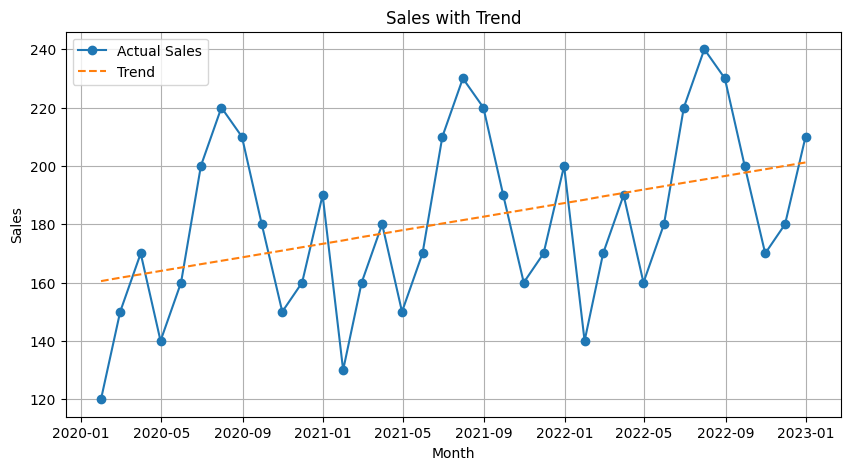

In [20]:
plt.figure(figsize = (10, 5))
plt.plot(df['Month'],df['Sales'], label = 'Actual Sales', marker = 'o')
plt.plot(df['Month'], df['Trend'], label = 'Trend', linestyle = '--')
plt.title('Sales with Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()